# Sandbox for exploring county level data

### Prep code

In [50]:
# %pip install pandas
# %pip install openpyxl
# %pip install matplotlib
# %pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


### Retrieve "export.csv" resulting from "base_code.R"

In [51]:
# data = pd.read_excel('../unzipped_shp_and_shx_shape_files/cleaned_export.xlsx', na_values=".")
data = pd.read_csv('../unzipped_shp_and_shx_shape_files/export.csv', na_values=".")

In [52]:
# data2 = data[['fips', 'population', 'intersects_per_road_length', 'road_length_per_intersect', 'population_density']]
# data2

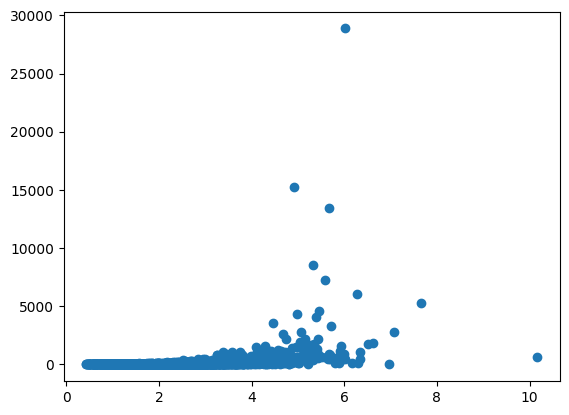

In [53]:
# Generate data...
x = data['intersects_per_road_length']
y = data['population_density']
c = data['population']
# Plot...
plt.scatter(x, y)
plt.gray()

plt.show()

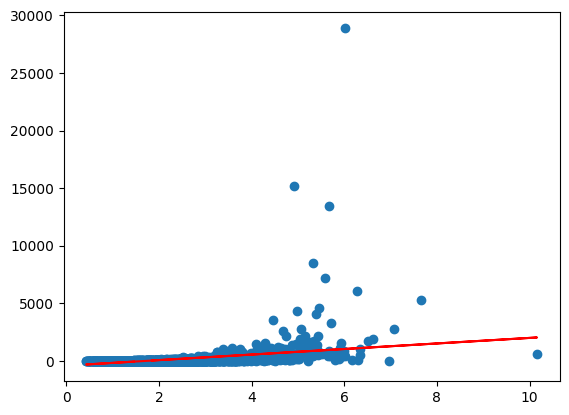

In [54]:

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here

# plt.savefig("figure.png")

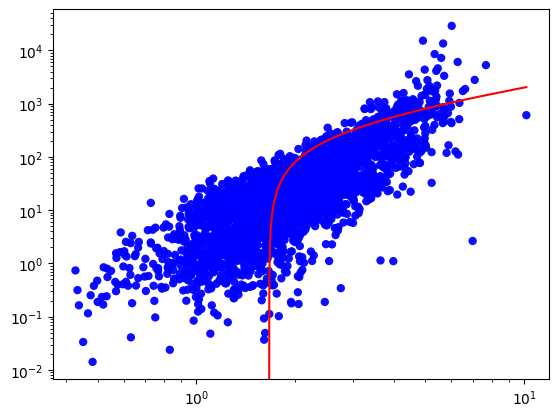

In [55]:
x1 = [X for (X,Y) in sorted(zip(x,y))]
y1 = [Y for (X,Y) in sorted(zip(x,y))]
x=np.array(x1)
y=np.array(y1)
fig = plt.figure()
ax=plt.gca() 
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] *x + fit[1], color='red') # add reg line
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


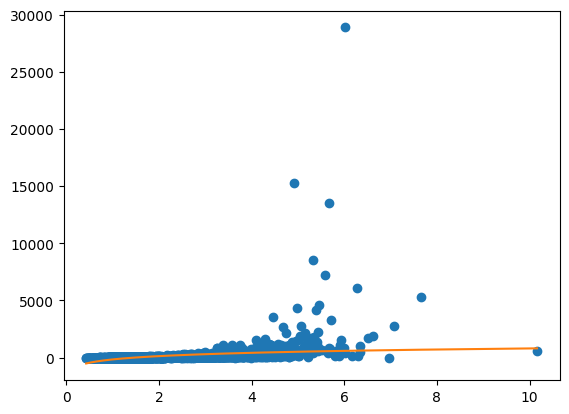

In [56]:
from scipy.optimize import curve_fit

plt.plot(x,y,'o')

# x = np.array(xdata, dtype=float) #transform your data in a numpy array of floats 
# y = np.array(ydata, dtype=float) #so the curve_fit can work

#def func(x,a,b,c):
#    return a*x**2+ b*x +c

def func(x,a,b):
    return a*np.log(x)+ b


popt, pcov = curve_fit(func, x, y)
x_sorted = np.sort(x)
plt.plot(x_sorted, func(x_sorted, *popt), label="Fitted Curve")
plt.show()

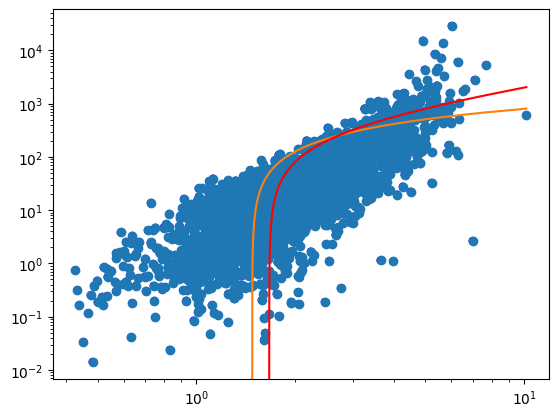

In [57]:
from scipy.optimize import curve_fit

plt.plot(x,y,'o')

# x = np.array(xdata, dtype=float) #transform your data in a numpy array of floats 
# y = np.array(ydata, dtype=float) #so the curve_fit can work

#def func(x,a,b,c):
#    return a*x**2+ b*x +c

def func(x,a,b):
    return a*np.log(x)+ b

ax=plt.gca() 
ax.plot(x_sorted, func(x_sorted, *popt), label="Fitted Curve")
ax.plot(x, fit[0] *x + fit[1], color='red') # add reg line
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')

popt, pcov = curve_fit(func, x, y)
x_sorted = np.sort(x)
plt.show()

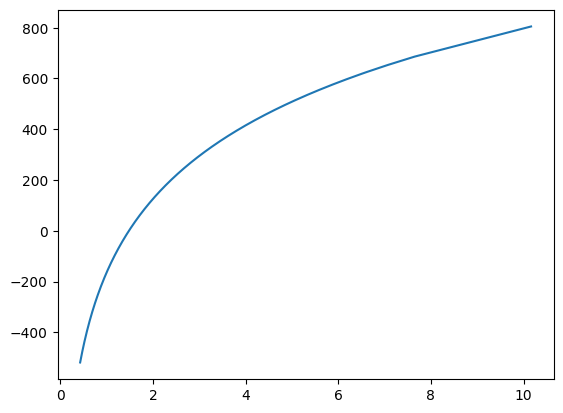

In [58]:

popt, pcov = curve_fit(func, x, y)
x_sorted = np.sort(x)
plt.plot(x_sorted, func(x_sorted, *popt), label="Fitted Curve")
plt.show()

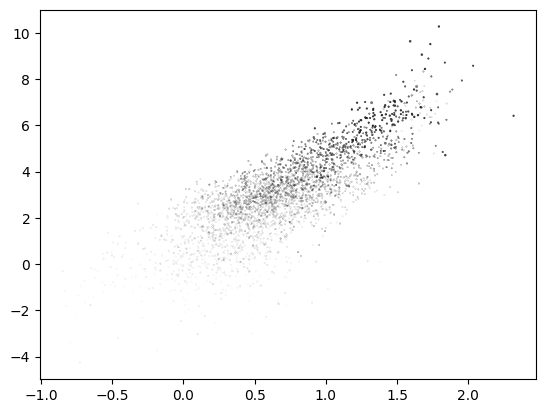

In [59]:
# Generate data...
x = data['intersects_per_road_length']
y = data['population_density']
c = data['population']
# Plot...
# plt.scatter(x, y, c=c, marker='x')

xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, c=c,s = c/1000000, marker='.',)


plt.show()

LinregressResult(slope=3.1843486009551687, intercept=0.7583561338884661, rvalue=0.7814573007739326, pvalue=0.0, stderr=0.045366705705999176, intercept_stderr=0.035642061509426344)


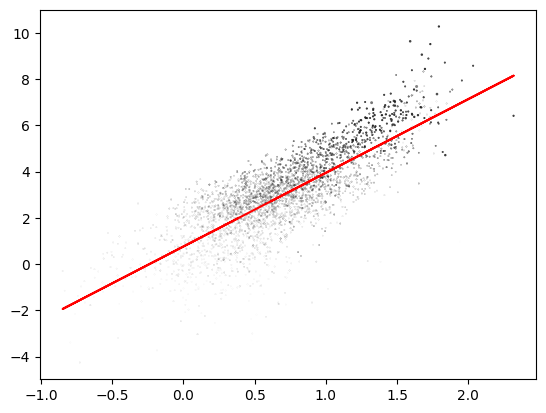

In [60]:
# Generate data...
x = data['intersects_per_road_length']
y = data['population_density']
c = data['population']
# Plot...
# plt.scatter(x, y, c=c, marker='x')

xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, c=c,s = c/1000000, marker='.',)
plt.plot(xn, m * xn + b, color="red")   # I've added a color argument here

print(stats)

plt.show()

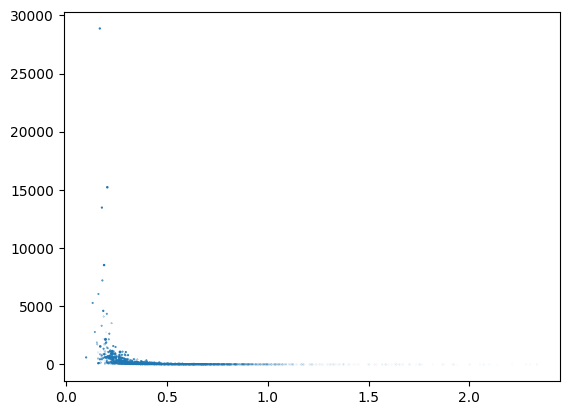

In [61]:
# calculate average road length per intersection per county

# Generate data...
x = data['road_length_per_intersect']
y = data['population_density']
c = data['population']


xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(x, y, s = c/1000000, marker='.',)


plt.show()

# this seems to indicate taht the shorter the road length is per intersect, the higher the population density
# but this is a given because this is the inverse of the road intersections per population density


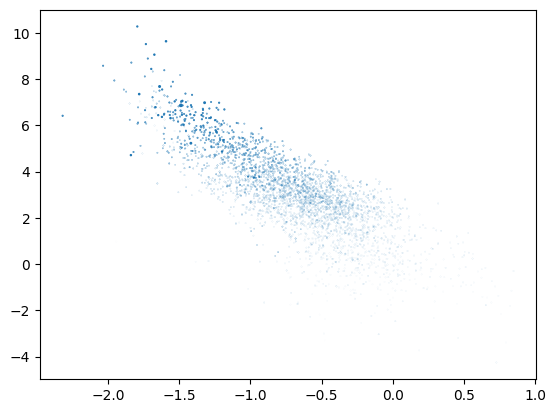

In [62]:
# calculate average road length per intersection per county

# Generate data...
x = data['road_length_per_intersect']
c = data['population']


xn = np.log(x)
yn = np.log(y)
stats = linregress(xn, yn)
m = stats.slope
b = stats.intercept

plt.scatter(xn, yn, s = c/1000000, marker='.',)


plt.show()

In [63]:
# select counties with population sizes of certain sizes and group them by color

In [64]:
stats = linregress(x, y)


In [65]:
stats

LinregressResult(slope=-462.2972911618715, intercept=373.35479105045965, rvalue=-0.17196917837630118, pvalue=2.7441556659004523e-22, stderr=47.25177319318506, intercept_stderr=30.00783142648095)

In [66]:
stats.rvalue

-0.17196917837630118

In [67]:
x

0       0.539614
1       0.392020
2       0.693972
3       0.644014
4       0.623577
          ...   
3138    0.715882
3139    0.613192
3140    0.721253
3141    1.018156
3142    0.685294
Name: road_length_per_intersect, Length: 3143, dtype: float64

In [68]:
y

0       38.194205
1       56.285207
2       11.004030
3       13.827786
4       35.404088
          ...    
3138     1.565296
3139     2.253813
3140     3.792915
3141     1.325422
3142     1.100985
Name: population_density, Length: 3143, dtype: float64

In [69]:
m

-3.1843486009551687